Source: https://www.nltk.org/book/ch01.html

# Language Processing and Python

It is easy to get our hands on millions of words of text. What can we do with it, assuming we can write some simple programs? In this chapter we'll address the following questions:

1. What can we achieve by combining simple programming techniques with large quantities of text?
2. How can we automatically extract key words and phrases that sum up the style and content of a text?
3. What tools and techniques does the Python programming language provide for such work?
4. What are some of the interesting challenges of natural language processing?

This chapter is divided into sections that skip between two quite different styles. In the "computing with language" sections we will take on some linguistically motivated programming tasks without necessarily explaining how they work. In the "closer look at Python" sections we will systematically review key programming concepts. We'll flag the two styles in the section titles, but later chapters will mix both styles without being so up-front about it. We hope this style of introduction gives you an authentic taste of what will come later, while covering a range of elementary concepts in linguistics and computer science. If you have basic familiarity with both areas, you can skip to lesson 5; we will repeat any important points in later chapters, and if you miss anything you can easily consult the online reference material at http://nltk.org/. If the material is completely new to you, this chapter will raise more questions than it answers, questions that are addressed in the rest of this book.

# 1. Computing with Language: Texts and Words

We're all very familiar with text, since we read and write it every day. Here we will treat text as *raw data* for the programs we write, programs that manupulate and analyst it in a variety of interesting ways. But before we can do this, we have to get started with the Python interpreter.

## 1.1 Getting Started with Python

One of the friendly things about Python is that it allows you to type directly into the interactive **interpreter** -- the program that will be running your Python programs. You can access the Python interpreter using a simple graphical interface called the Interactive DeveLopment Environment (IDLE). On a Mac you can find this under *Applications > MacPython*, and on Windows under *All Programs > Python*. Under Unix you can run Python from the shell by typing "idle" (if this is not installed, try typing "python"). The interpreter will paint a blurb about your Python version; simply check that you are running Python 3.2 or later (here it is for 3.9.13):

In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\rober\anaconda3\python.exe
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)


The >>> prompt indicates that the Python interpreter is now waiting for input. When copying examples from this book, don't type the ">>>" yourself. Now, let's begin by using Python as a calculator:

In [3]:
1 + 5 * 2 - 3

8

Once the interpreter has finished calculating the answer and displaying it, the prompt reappears. This means the Python interpreter is waiting for another instruction.

The preceding examples demonstrate how you can work interactively with the Python interpreter, experimenting with various expressions in the language to see what they do. Now let's try a nonsensical expression to see how the interpreter handles it:

In [4]:
1 +

SyntaxError: invalid syntax (1278102326.py, line 1)

This produced a syntax error. In Python, it doesn't make sense to end an instruction with a plus sign. The Python interpreter indicates the line where the problem occurred (line 1 of [stdin], which stands for "standard input").

Now that we can use the Python interpreter, we're ready to start working with language data.

## 1.2 Getting Started with NLTK

Before going further you should install NLTK 3.0, downloadbale for from http://nltk.org/. Follow the instructions there to download the version required for your platform.

Once you've installed NLTK, start up the Python interpreter as before, and install the data required for the book by typing the following two commands at the Python prompt, then selecting the book collection as shown in the image below:

In [7]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

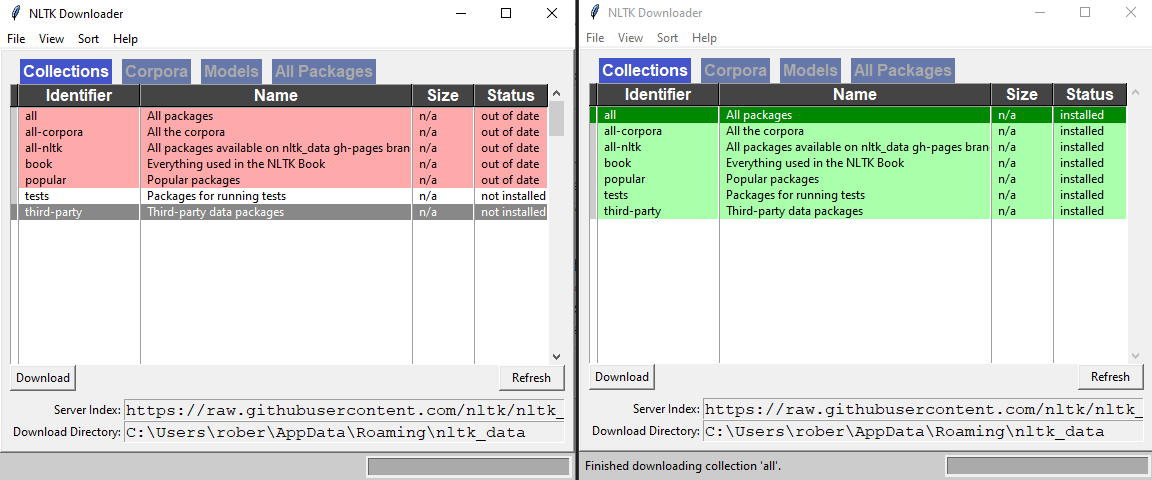

Once the data is downloaded to your machine, you can load some of it using the Python interpreter. The first step is to type a special command at the Python prompt which tells the interpreter to load some texts for us to explore. The command below says "from NLTK's book module, load all items." The book module contains all the data you will need as you read this chapter. After printing a welcome message, it loads the text of several books (this will take a few seconds). Here's the command again, together with the output that you will see. Take care to get spelling and punctuation right, and remember that you don't type the >>>.

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


Any time we want to find out about these texts, we just have to enter their names at the Python prompt:

In [9]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [10]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

Now that we can use the Python interpreter, and have some data to work with, we're ready to get started.

## 1.3 Searching Text

There are many ways to examine the context of a text apart from simply reading it. A concordance view shows us every occurrence of a given word, together with some context. Here we look up the word *monstrous* in *Moby Dick* by entering text1 followed by a period, then the term "concordance", then placing "monstrous" in parentheses:

In [11]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


The first time you use a concordance on a particular text, it takes a few extra seconds to build an index so that subsequent searches are fast.

Once you've spent a little while examining these texts, we hope you have a new sense of the richness and diversity of language. In the next chapter you will learn how to access a broader range of text, including texts in languages other than English.

A concorance permits us to see words in context. For example, we saw that *monstrous* occurred in contexts such as *the ___ pictures* and *a ___ size*. What other words appear in a similar range of contexts? We can find out by appending the term [similar] to the name of the text in question, then inserting the relevant word in parentheses:

In [12]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [13]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, *monstrous* has positive connotations, and sometimes functions as an intensifier like the word *very*.

The term [common_contexts] allows us to examine just the contexts that are shared by two or more words, such as *monstrous* and *very*. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [14]:
text2.common_contexts(["monstrous", "very"])

am_glad a_pretty a_lucky is_pretty be_glad


It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the *location* of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a **dispersion plot**. Each stripe represents an instance of a word, and each row represents the entire text. In the figure below we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural address Corpus end-to-end). You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? As before, take care to get the quotes, commas, brackets and parenthese exactly right.

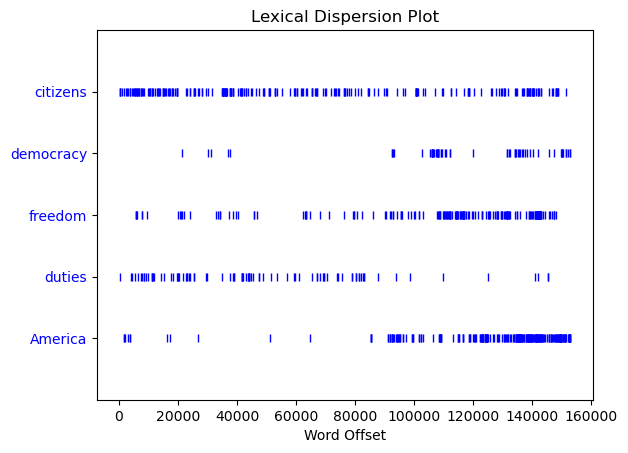

In [15]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

**Important**: You need to have Python's NumPy and Matplotlib packages installed in order to produce the graphical plots used in this book. Please see http://nltk.org/ for installation instructions.

You can also plot the frequency of word usage through time using https://books.google.com/ngrams

Now, just for fun, let's try generating some random text in the various styles we have just seen. To do this, we type the name of the text followed by the term [generate]. (We need to include the parentheses, but there's nothing that goes between them.)

In [16]:
text3.generate()

Building ngram index...


lamb for a burnt offering in the city . , duke Elah , duke Shobal ,
and Akan . and looked upon my affliction . Because the LORD God
amongst the trees of the mighty God of Abraham his father , that they
found a plain man , and the wo The blessings of my hand to do justice
and judgment ; that the LORD that spake unto me , and put him into the
ark , and for your little ones . they heard that they have brought it
unto Hagar , Sarai ' s brother will I slay


"lamb for a burnt offering in the city . , duke Elah , duke Shobal ,\nand Akan . and looked upon my affliction . Because the LORD God\namongst the trees of the mighty God of Abraham his father , that they\nfound a plain man , and the wo The blessings of my hand to do justice\nand judgment ; that the LORD that spake unto me , and put him into the\nark , and for your little ones . they heard that they have brought it\nunto Hagar , Sarai ' s brother will I slay"

## 1.3 Counting Vocabulary